In [23]:
import statsmodels.api as sm
import pandas as pd
import pylab as pl
import numpy as np

In [25]:
df = pd.read_csv('binary.csv')

In [27]:
df.columns = ["admit", "gre", "gpa", "prestige"]

In [29]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [30]:
df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64

In [31]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [32]:
pd.crosstab(df['prestige'], df['admit'], rownames=['prestige'])

admit,0,1
prestige,,
1,28,33
2,97,54
3,93,28
4,55,12


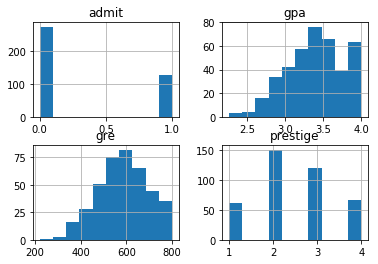

In [53]:
df.hist()
pl.show()

In [36]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

In [37]:
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [43]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])

Notice the column 'prestige_1' is excluded on purpose to avoid  Because the sum of all dummy variables is 1 (prestige_1 + prestige_2 + prestige_3 + prestige_4 = 1 for each row). If you know the value of prestige_2 to 4, then prestige_1 is already decided. If you add prestige_1 to dataset, it will cause [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity) or [dummy variable trap](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)).

In [44]:
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [45]:
data['intercept'] = 1.0

In [46]:
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [47]:
train_cols = data.columns[1:]

In [48]:
logit = sm.Logit(data['admit'], data[train_cols])

In [49]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 22 Mar 2018   Pseudo R-squ.:                 0.08292
Time:                        15:06:07   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
prestige_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
prestige_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""

Odds ratio:

In [52]:
np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64

For more in depth explanation of odds ratio by UCLA, see [FAQ: How do I interpret odds ratios in logistic regression?](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/)